# Data analysis

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
%load_ext autoreload
%autoreload 2

In [15]:
import cv2
import os
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import numpy as np
import operator
import skimage.io
from xml.dom import minidom
from wordcloud import WordCloud
from PIL import Image, ImageOps
from os import path, getcwd
from data_manipulation import DATA_DIR

In [5]:
# predpripravene zoznamy na rozdelenie dat na trenovacie a testovacie
train = sio.loadmat(DATA_DIR+'/Lists/train_list.mat')
test = sio.loadmat(DATA_DIR+'/Lists/test_list.mat')
file = sio.loadmat(DATA_DIR+'/Lists/file_list.mat')


In [22]:
# pocet vzoriek celkovo
print(len(file['file_list']))

20580


In [17]:
# pocet vzoriek v trenovacej sade
print(len(train['file_list']))

12000


In [6]:
# pocet vzoriek v testovacom datasete
print(len(test['file_list']))

8580


In [34]:
# vytvorenie pola dat zo vsetkych dat

data_all = []

annotations_folder = os.path.join(DATA_DIR, 'Annotation')
for sample in file['file_list']:
    sample_path = os.path.join(annotations_folder, sample[0][0].split('.')[0])
    dom = minidom.parse(sample_path)
    object_tag = dom.getElementsByTagName('object')
    bndbox_tag = object_tag[0].getElementsByTagName('bndbox')
    xmin = int(bndbox_tag[0].getElementsByTagName('xmin')[0].firstChild.nodeValue)
    ymin = int(bndbox_tag[0].getElementsByTagName('ymin')[0].firstChild.nodeValue)
    xmax = int(bndbox_tag[0].getElementsByTagName('xmax')[0].firstChild.nodeValue)
    ymax = int(bndbox_tag[0].getElementsByTagName('ymax')[0].firstChild.nodeValue)
    
    breed = object_tag[0].getElementsByTagName('name')[0].firstChild.nodeValue
    
    size_tag = dom.getElementsByTagName('size')
    width = int(size_tag[0].getElementsByTagName('width')[0].firstChild.nodeValue)
    height = int(size_tag[0].getElementsByTagName('height')[0].firstChild.nodeValue)
    
    # print(sample_path, xmin, ymin, xmax, ymax, width, height)
    # data = np.append([data], [sample_path, xmin, ymin, xmax, ymax, width, height])
    data_all.append([sample_path, xmin, ymin, xmax, ymax, width, height, breed])

print(data_all[:10])

[['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_10074', 25, 10, 276, 498, 333, 500, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_10131', 49, 9, 393, 493, 395, 495, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_10621', 142, 43, 335, 250, 500, 298, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_1073', 0, 27, 312, 498, 345, 500, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_10976', 90, 104, 242, 452, 322, 484, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_11140', 17, 38, 451, 253, 500, 375, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_11238', 39, 191, 145, 383, 382, 384, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_11258', 76, 30, 363, 375, 375, 500, 'Chihuahua'], ['/tf/notebooks

In [36]:
# vytvorenie pola parametrov z trenovacich dat, ktore sme zobrali zo suborov, ktore obsahuju anotacie obrazkov

data = []

annotations_folder = os.path.join(DATA_DIR, 'Annotation')
for sample in train['file_list']:
    sample_path = os.path.join(annotations_folder, sample[0][0].split('.')[0])
    dom = minidom.parse(sample_path)
    object_tag = dom.getElementsByTagName('object')
    bndbox_tag = object_tag[0].getElementsByTagName('bndbox')
    xmin = int(bndbox_tag[0].getElementsByTagName('xmin')[0].firstChild.nodeValue)
    ymin = int(bndbox_tag[0].getElementsByTagName('ymin')[0].firstChild.nodeValue)
    xmax = int(bndbox_tag[0].getElementsByTagName('xmax')[0].firstChild.nodeValue)
    ymax = int(bndbox_tag[0].getElementsByTagName('ymax')[0].firstChild.nodeValue)
    
    breed = object_tag[0].getElementsByTagName('name')[0].firstChild.nodeValue
    
    size_tag = dom.getElementsByTagName('size')
    width = int(size_tag[0].getElementsByTagName('width')[0].firstChild.nodeValue)
    height = int(size_tag[0].getElementsByTagName('height')[0].firstChild.nodeValue)
    
    # print(sample_path, xmin, ymin, xmax, ymax, width, height)
    # data = np.append([data], [sample_path, xmin, ymin, xmax, ymax, width, height])
    data.append([sample_path, xmin, ymin, xmax, ymax, width, height, breed])

print(data[:10])
    

[['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_5927', 30, 14, 236, 298, 360, 300, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_4441', 107, 110, 296, 401, 375, 500, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_1502', 51, 13, 418, 331, 500, 333, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_1916', 8, 7, 456, 397, 500, 495, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_13151', 176, 29, 379, 333, 500, 336, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_1569', 24, 10, 277, 273, 278, 274, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_9654', 0, 36, 420, 498, 461, 500, 'Chihuahua'], ['/tf/notebooks/dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_3975', 45, 63, 274, 463, 336, 500, 'Chihuahua'], ['/tf/notebooks/dog_br

In [140]:
# vytvorenie dataframu zo vsetkych dat
df_all = pd.DataFrame(data_all, columns=['sample_path', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height', 'breed'])

In [142]:
# anotovana vyska a sirka
df_all['cropped_width'] = df_all['xmax'] - df_all['xmin']
df_all['cropped_height'] = df_all['ymax'] - df_all['ymin']

In [143]:
df_all.head()

,sample_path,xmin,ymin,xmax,ymax,width,height,breed,cropped_width,cropped_height
0,/tf/notebooks/dog_breeds_data/Annotation/n0208...,25,10,276,498,333,500,Chihuahua,251,488
1,/tf/notebooks/dog_breeds_data/Annotation/n0208...,49,9,393,493,395,495,Chihuahua,344,484
2,/tf/notebooks/dog_breeds_data/Annotation/n0208...,142,43,335,250,500,298,Chihuahua,193,207
3,/tf/notebooks/dog_breeds_data/Annotation/n0208...,0,27,312,498,345,500,Chihuahua,312,471
4,/tf/notebooks/dog_breeds_data/Annotation/n0208...,90,104,242,452,322,484,Chihuahua,152,348


## Analyza dolezitych atributov

In [144]:
df_all['cropped_width'].describe()

count    20580.000000
mean       289.040671
std        128.577818
min         32.000000
25%        200.000000
50%        279.000000
75%        362.000000
max       2735.000000
Name: cropped_width, dtype: float64

In [145]:
df_all['cropped_height'].describe()

count    20580.000000
mean       297.629932
std        119.853244
min         38.000000
25%        220.000000
50%        291.000000
75%        357.000000
max       2025.000000
Name: cropped_height, dtype: float64

In [146]:
df_all['breed'].describe()

count           20580
unique            120
top       Maltese_dog
freq              252
Name: breed, dtype: object

In [158]:
# v celej sade su rozdielne pocty vzoriek pre kazde plemeno
df_all.groupby(['breed'])['breed'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,breed,count
44,Maltese_dog,252
0,Afghan_hound,239
60,Scottish_deerhound,232
53,Pomeranian,219
58,Samoyed,218
...,...,...
95,golden_retriever,150
91,dhole,150
74,affenpinscher,150
51,Pekinese,149


In [39]:
# trenovaci dataframe
df_train = pd.DataFrame(data, columns=['sample_path', 'xmin', 'ymin', 'xmax', 'ymax', 'width', 'height', 'breed'])

In [42]:
df_train['cropped_width'] = df_train['xmax'] - df_train['xmin']
df_train['cropped_height'] = df_train['ymax'] - df_train['ymin']

In [114]:
df_train.head()

,sample_path,xmin,ymin,xmax,ymax,width,height,cropped_width,cropped_height,breed
0,/tf/notebooks/dog_breeds_data/Annotation/n0208...,30,14,236,298,360,300,206,284,Chihuahua
1,/tf/notebooks/dog_breeds_data/Annotation/n0208...,107,110,296,401,375,500,189,291,Chihuahua
2,/tf/notebooks/dog_breeds_data/Annotation/n0208...,51,13,418,331,500,333,367,318,Chihuahua
3,/tf/notebooks/dog_breeds_data/Annotation/n0208...,8,7,456,397,500,495,448,390,Chihuahua
4,/tf/notebooks/dog_breeds_data/Annotation/n0208...,176,29,379,333,500,336,203,304,Chihuahua


## Analyza atributov trenovacich dat

In [45]:
df_train['cropped_width'].describe()

count    12000.000000
mean       289.609750
std        129.711928
min         32.000000
25%        200.000000
50%        279.000000
75%        363.000000
max       2735.000000
Name: cropped_width, dtype: float64

In [51]:
df_train['cropped_height'].describe()

count    12000.000000
mean       298.430750
std        120.949347
min         38.000000
25%        221.000000
50%        291.000000
75%        357.000000
max       1823.000000
Name: cropped_height, dtype: float64

In [91]:
# z kazdeho plemena sa v trenovacej sade nachadza rovnaky pocet vzoriek
df_train['breed'].describe()

count               12000
unique                120
top       standard_poodle
freq                  100
Name: breed, dtype: object

In [127]:
df_train.groupby(['breed']).size()

breed
Afghan_hound                      100
African_hunting_dog               100
Airedale                          100
American_Staffordshire_terrier    100
Appenzeller                       100
                                 ... 
toy_poodle                        100
toy_terrier                       100
vizsla                            100
whippet                           100
wire-haired_fox_terrier           100
Length: 120, dtype: int64

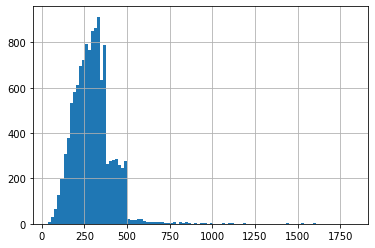

In [61]:
# z tohto histogramu je zrejme, ze priemerna vyska obrazka v trenovacich datach sa pohybuje najma v rozmedzi 200 do 350.
df_train['cropped_height'].hist(bins=100)

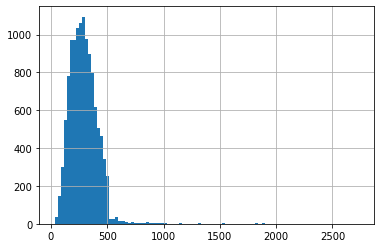

In [63]:
# z tohto histogramu vidime, ze priemerna sirka testovacich dat je v rozsahu 100 az 400
df_train['cropped_width'].hist(bins=100)

Ukazka anotacie dat k jednemu obrazku. anotacie su vo formate xml. Z tychto anotaci sme ukladali informacie potrebne na pracovanie s obrazkami. Dolezite informacie su sirka, vyska, plemeno a suradnice anotacii: xmin, ymin, xmax, ymax.

In [162]:

dom = minidom.parse('./dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_1235')
xml_as_string = dom.toxml()
print(xml_as_string)


<?xml version="1.0" ?><annotation>
	<folder>02085620</folder>
	<filename>n02085620_1235</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Chihuahua</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>194</xmin>
			<ymin>111</ymin>
			<xmax>275</xmax>
			<ymax>299</ymax>
		</bndbox>
	</object>
</annotation>


In [ ]:
# vytvoreny dict z plemien testovaich dat, ktory je potrebny na vytvorenie word cloudu
breeds_test_dict = {i:breeds_test.count(i) for i in set(breeds_test)}

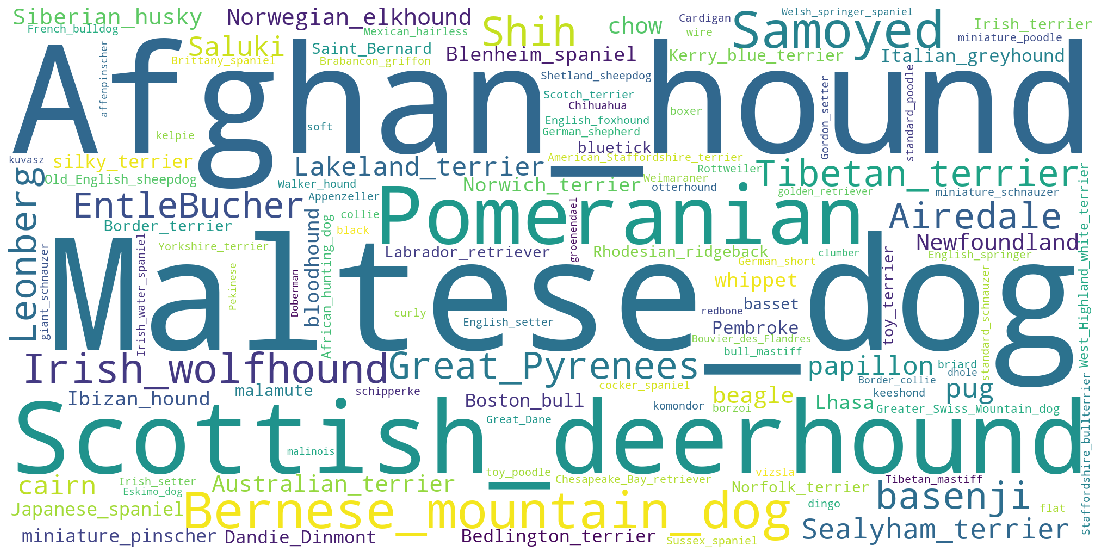

In [32]:
# tento diagram zobrazuje pocetnost plemien v testovacom datasete.
breeds_test = []
for sample in test['file_list']:
    breeds_test.append(sample[0].item().split('-')[1].split('/')[0])

breeds_string = (" ").join(breeds_test)

wc = WordCloud(background_color="white", max_words=120, width=2000, height=1000, collocations=False, normalize_plurals=False).generate_from_frequencies(breeds_test_dict)
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()



## Ukazky upravovania obrazkov

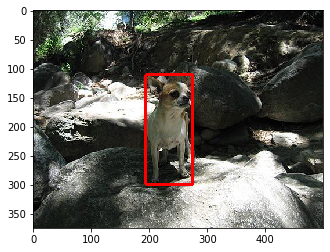

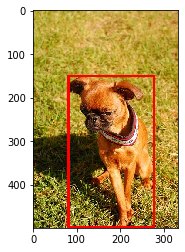

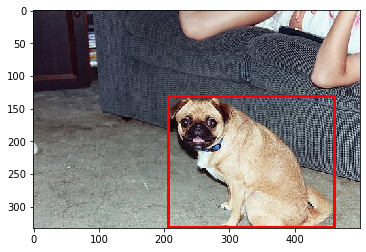

In [173]:
# Ukazka pracovania s anotaciami. Podla nich sme orezavali obrazky aby sme s nimi mohli lepsie pracovat. 

def create_rectangle(path, image_path, i):
    plt.figure(i)
    dom = minidom.parse(path)

    objectTag = dom.getElementsByTagName('object')
    bndboxTag = objectTag[0].getElementsByTagName('bndbox')
    xmin = int(bndboxTag[0].getElementsByTagName('xmin')[0].firstChild.nodeValue)
    ymin = int(bndboxTag[0].getElementsByTagName('ymin')[0].firstChild.nodeValue)
    xmax = int(bndboxTag[0].getElementsByTagName('xmax')[0].firstChild.nodeValue)
    ymax = int(bndboxTag[0].getElementsByTagName('ymax')[0].firstChild.nodeValue)

    img = cv2.imread(image_path)
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 0, 255), 3)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

path1 = './dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_1235'
path2 = './dog_breeds_data/Annotation/n02112706-Brabancon_griffon/n02112706_605'
path3 = './dog_breeds_data/Annotation/n02110958-pug/n02110958_483'

image_path1 = './dog_breeds_data/Images/n02085620-Chihuahua/n02085620_1235.jpg'
image_path2 = './dog_breeds_data/Images/n02112706-Brabancon_griffon/n02112706_605.jpg'
image_path3 = './dog_breeds_data/Images/n02110958-pug/n02110958_483.jpg'

create_rectangle(path1, image_path1, 1)
create_rectangle(path2, image_path2, 2)
create_rectangle(path3, image_path3, 3)


plt.show()

In [33]:
# zobrazena konkretna pocetnost plemien pre testovaci dataset
sorted_x = sorted(breeds_test_dict.items(), key=operator.itemgetter(1))
print(sorted_x)

[('redbone', 48), ('Pekinese', 49), ('Irish_water_spaniel', 50), ('Welsh_springer_spaniel', 50), ('Eskimo_dog', 50), ('golden_retriever', 50), ('affenpinscher', 50), ('Bouvier_des_Flandres', 50), ('malinois', 50), ('Doberman', 50), ('dhole', 50), ('groenendael', 50), ('clumber', 50), ('Border_collie', 50), ('kuvasz', 50), ('toy_poodle', 51), ('borzoi', 51), ('Appenzeller', 51), ('curly', 51), ('otterhound', 51), ('boxer', 51), ('Sussex_spaniel', 51), ('Tibetan_mastiff', 52), ('flat', 52), ('Chihuahua', 52), ('Brittany_spaniel', 52), ('briard', 52), ('German_shepherd', 52), ('Rottweiler', 52), ('German_short', 52), ('collie', 53), ('Walker_hound', 53), ('Gordon_setter', 53), ('Brabancon_griffon', 53), ('kelpie', 53), ('vizsla', 54), ('miniature_schnauzer', 54), ('komondor', 54), ('schipperke', 54), ('Mexican_hairless', 55), ('standard_schnauzer', 55), ('Irish_setter', 55), ('Cardigan', 55), ('Staffordshire_bullterrier', 55), ('miniature_poodle', 55), ('Great_Dane', 56), ('soft', 56), ('

Ukazka zobrazenia upravy obrazkov, ktore sme vyuzivali. Najskor je obrazok vyrezany podla anotacii. Urcili sme si 
rozmer, aby boli vsetky obrazky rovnakeho rozmeru. Ak bol teda nejaky obrazok vacsi, resizli sme ho a paddingom 
doplnili na nami urceny rozmer.

96 96 103 103


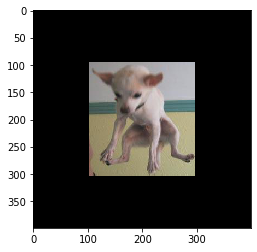

(399, 399, 3)


In [27]:

def get_new_size(width, height, max_size):
    if width > height:
        scale = max_size/width
    else:
        scale = max_size/height
    new_width, new_height = width*scale, height*scale
    return new_width, new_height


def add_padding(width, height, max_size):
    delta_w = width - max_size
    delta_h = height - max_size
    dst = cv2.copyMakeBorder(src, top, bottom, left, right, borderType, None, value)
    return padding

max_size = 400
dom = minidom.parse('./dog_breeds_data/Annotation/n02085620-Chihuahua/n02085620_10621')
objectTag = dom.getElementsByTagName('object')
bndboxTag = objectTag[0].getElementsByTagName('bndbox')
xmin = int(bndboxTag[0].getElementsByTagName('xmin')[0].firstChild.nodeValue)
ymin = int(bndboxTag[0].getElementsByTagName('ymin')[0].firstChild.nodeValue)
xmax = int(bndboxTag[0].getElementsByTagName('xmax')[0].firstChild.nodeValue)
ymax = int(bndboxTag[0].getElementsByTagName('ymax')[0].firstChild.nodeValue)

# img = cv2.imread('./dog_breeds_data/Images/n02085620-Chihuahua/n02085620_10074.jpg')
img = skimage.io.imread('./dog_breeds_data/Images/n02085620-Chihuahua/n02085620_10621.jpg')
cropped_img = img[ymin:ymax, xmin:xmax]

width = xmax - xmin
height = ymax - ymin
if width > max_size or height > max_size:
    width, height = get_new_size(width, height, max_size)
    cropped_img = cv2.resize(cropped_img, (int(width), int(height)))

#     padding = add_padding(width, height, max_size)
#     cropped_img = ImageOps.expand(cropped_img, padding)
borderType = cv2.BORDER_CONSTANT
top = int((max_size - height) / 2)
bottom = int((max_size - height) / 2)
left = int((max_size - width) / 2)
right = int((max_size - width) / 2)
print(top, bottom, left, right)
cropped_img = cv2.copyMakeBorder(cropped_img, top, bottom, left, right, borderType)

# plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.imshow(cropped_img)
plt.show()
print(cropped_img.shape)